# heart disease model

## Import Libraries

In [2]:
!pip install ucimlrepo --quiet
import urllib

# Numpy and Pandas libraries for storing and manipulating data
import numpy as np
import pandas as pd

# Seaborn and Matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-Learn Descision Tree, Logistic Regression and helper function
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

RANDOM_SEED = 10


In [3]:
# Tutorial Quiz 1
import torch

# Tutorial Quiz 2
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)

# Tutorial Quiz 3 datetime
import datetime as dt

# Tutorial Quiz 4 file path
import os
os.makedirs("./results/model_a/run_1")

# Tutorial Quiz 5 adding
def add(a, b):
    return a + b


## Tutorial Quiz Part 2 Data Preparation

In [ ]:
# Tutorial Quiz Part 2 Data Preparation From Tutorial
selected_features = ['chlorides', 'density',  'alcohol']
X = df[selected_features]

## Download Data

Helper function for downloading data

In [5]:
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

y['num'] = y['num'].apply(lambda x: 1 if x > 0 else 0)

# Concatenate X and y along columns
df = pd.concat([X, y], axis=1)

# To verify
# print(df.head())
# df.info()

# metadata
# print(heart_disease.metadata)
X.info()

# variable information
# print(heart_disease.variables)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


<ipython-input-5-7c96d0b31091>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = y['num'].apply(lambda x: 1 if x > 0 else 0)


In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Data Exploration

Load the training data set in as a Pandas DataFrame using read_csv() function. Pandas DataFrame is commonly used in Python for data analytic.

It provides convenient methods to explore, manipulate and extract statistical information from large data set.

Let's take a look at parts of the DataFrame

Every row in the DataFrame is a sample, and each sample is represented by some feature/label values in the column.

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


We can use the .info() method to print out a concise summary of the DataFrame.

It shows us the range indexes, the number of columns, the number of non-null entries, the data type of the columns, and memory usage.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


The .describe() method prints out the statistics of each column in the DataFrame.

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


We can retrieve the values of a column and plot its histogram to take a look at the distribution of its values.

The .hist() method is a convinent method to plot the distribution of DataFrame columns.

Below is an example to retrieve the "fixed acidity" and "pH" columns and plotting their respective histograms. Note, that you can retrieve an entire column by using the square bracket syntax df[column_name].

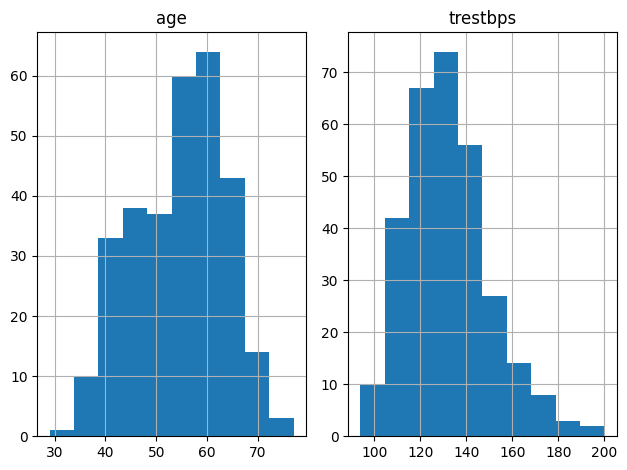

In [11]:
# select columns of the DataFrame and plot their histograms
columns = ['age', 'trestbps']
df[columns].hist()

# adjust the layout of the plots and show them
plt.tight_layout()
plt.show()

We can also look at the correlation between two columns to get a sense of the important features that correlates with the "quality" column using .corr() method.



In [12]:
# shows a table view of the correlation between every pair of features
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.424510


Make the correlation table more visually informative by passing in the correlation matrix into the Seaborn library's heatmap() function

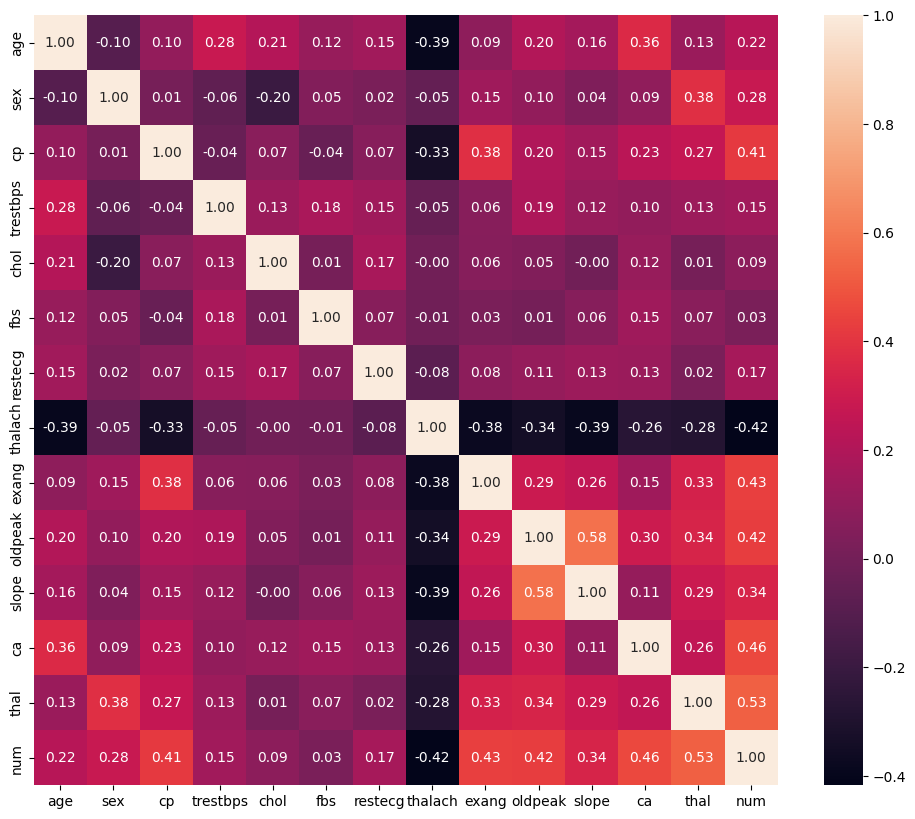

In [13]:
# adjust the size of the figure
plt.figure(figsize=(12,10))

# pass the correlation table into seaborn heatmap
# set annotation to be 2 floating point precisions
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

## Data Preparation

Now that we have a better understand of the data set, we will split the data into data features (X) and data labels (y).
- When creating the data features, we will select features that are important based on the correlation matrix above or based on our domain knowledge.

In [14]:
# select a set of feature columns as X and select the "quality" column as y
selected_features = ['age', 'sex', 'cp',
                     'trestbps', 'chol', 'fbs', 'restecg',
                     'thalach', 'exang', 'oldpeak', 'slope']
X = df[selected_features]
y = df['num']


Now, we will need to split the dataset into training data and validation data using train_test_split() function from Scikit-Learn. The validation data will be used to evaluate our model after training.

In [15]:
# we will set aside 20% of the training data as validation data
test_ratio = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_ratio,
                                                      random_state=RANDOM_SEED)

In [16]:
# Normalize
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_normalized = scaler.transform(X_train)
X_valid_normalized = scaler.transform(X_valid)

# Convert the numpy arrays back to DataFrames
X_train_df = pd.DataFrame(X_train_normalized, columns=X_train.columns)
X_test_df = pd.DataFrame(X_valid_normalized, columns=X_valid.columns)

# Create a DataFrame for the normalized training data
train_df_normalized = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)

# Create a DataFrame for the normalized testing data
test_df_normalized = pd.concat([X_test_df, y_valid.reset_index(drop=True)], axis=1)

# Display the first few rows of each normalized DataFrame
print("Normalized Training DataFrame:")
print(train_df_normalized.head())

print("\nNormalized Testing DataFrame:")
print(test_df_normalized.head())

Normalized Training DataFrame:
        age       sex        cp  trestbps      chol       fbs  restecg  \
0  0.400904 -1.450022  0.881362  2.323831 -0.472274  2.473388  0.99386   
1  0.291526 -1.450022  0.881362 -0.205285  1.090055 -0.404304  0.99386   
2 -0.583503 -1.450022  0.881362 -0.084851  0.409040 -0.404304 -1.01881   
3  0.619661  0.689645  0.881362  0.818404  0.669428 -0.404304  0.99386   
4 -1.349154  0.689645  0.881362  0.517319 -0.452245 -0.404304 -1.01881   

    thalach     exang   oldpeak     slope  num  
0 -0.221918  1.423025  1.600317  0.693465    1  
1  0.365260 -0.702728 -0.889065 -0.935841    0  
2  0.545930 -0.702728 -0.889065 -0.935841    0  
3 -0.402588  1.423025  1.600317  0.693465    1  
4  1.223443 -0.702728 -0.889065 -0.935841    0  

Normalized Testing DataFrame:
        age       sex        cp  trestbps      chol       fbs  restecg  \
0  0.400904  0.689645  0.881362 -1.891363 -0.292006 -0.404304 -1.01881   
1  0.510283  0.689645 -2.209791  2.805567  0.429070

Verify the label distribution are similar for the training set and validation set. If they are drastically different, you will want to rerun train_test_split() with a different random_state.

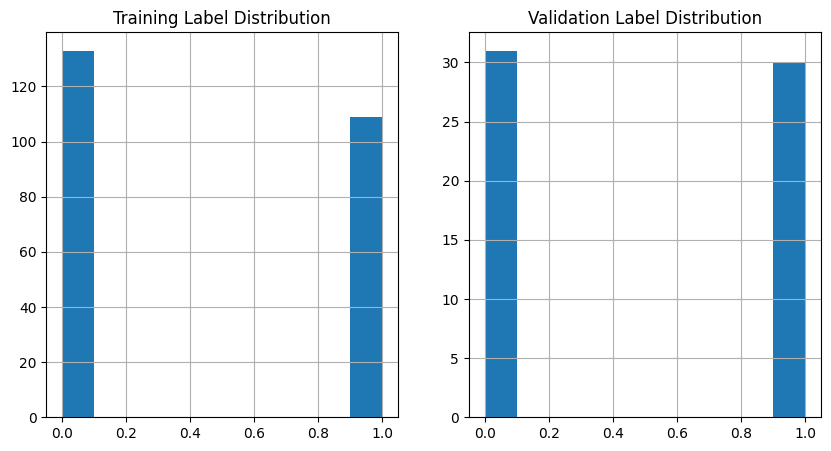

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
y_train.hist()
plt.title('Training Label Distribution')

plt.subplot(1,2,2)
y_valid.hist()
plt.title('Validation Label Distribution')

plt.show()

## Model Building, Evaluation and Testing


# KNN Is My Model Of Choice

In [39]:
# Implement a function that calculates the prediction accuracy.
def calculate_accuracy(pred_labels: np.ndarray, true_labels: np.ndarray):
    accuracy = np.sum(pred_labels==true_labels) / true_labels.__len__() * 100
    return accuracy


In [40]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  # You can vary the number of neighbors

classifier.fit(X_train_normalized, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [41]:
pred_train = classifier.predict(X_train_normalized)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')

pred_valid = classifier.predict(X_valid_normalized)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 88.43%
Model accuracy on validation data set is 85.25%


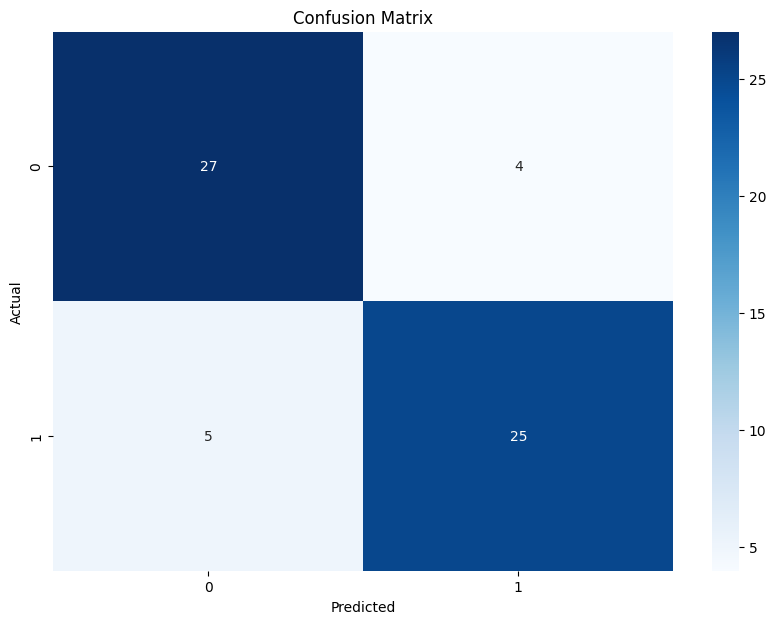

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have X_test_normalized and y_test already split and available

# 1. Predict on Test Data
y_pred = classifier.predict(X_valid_normalized)

# 2. Compute the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred)

# 3. Visualize the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Additional models performance is listed below

The methods listed below are just alterntive classifiers that did not perform as well but are listed for refference

### Decision Tree


In [18]:
# initialize Decision Tree classifier with max tree depth of 4
classifier = tree.DecisionTreeClassifier(max_depth=4)

# Train the Decision Tree classifier with the training data
classifier = classifier.fit(X_train, y_train)

Verify the model performance using the training set and validation set

In [19]:
# Implement a function that calculates the prediction accuracy.
def calculate_accuracy(pred_labels: np.ndarray, true_labels: np.ndarray):
    accuracy = np.sum(pred_labels==true_labels) / true_labels.__len__() * 100
    return accuracy

# get the predicted labels of the training data and calculate the accuracy
pred_train = classifier.predict(X_train)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')

# get the predicted labels of the validation data and calculate the accuracy
pred_valid = classifier.predict(X_valid)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 84.30%
Model accuracy on validation data set is 80.33%


Now, we will save the decision rule as an image file ("tree.png") and visualize the decision rules that the classifier has learned.

Every node in the tree has a split condition based on a feature. The left branch is when condition is true and the right branch is when condition is false. Additionally, every node also shows the number of samples in each class and an impurity value for all the samples within that node.

In [20]:
import graphviz

# convert the tree into a Graphviz representation
# and render the tree diagram
class_names = [str(cls) for cls in sorted(df['num'].unique())]
dot_data = tree.export_graphviz(classifier,                   # classifier to extract the rules from
                      feature_names=selected_features,        # the feature names that were used
                      class_names=class_names,                # the class labels, converted to string
                      filled=True, rounded=True,              # asethetic of the diagram
                      special_characters=True)
graph = graphviz.Source(dot_data)

# save the graph as "tree.png" file under the working directory
graph.render(filename='tree', format='png')

'tree.png'

### Logistic Regression

In [21]:
# initialize Logistic Regression classifier with default parameters
classifier = LogisticRegression(max_iter=10000)

# Train the Logistic Regression classifier with the training data
classifier = classifier.fit(X_train_normalized, y_train)

Now, let's check the performance of the model on the training and validation dataset

In [22]:
pred_train = classifier.predict(X_train_normalized)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')

pred_valid = classifier.predict(X_valid_normalized)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 80.17%
Model accuracy on validation data set is 75.41%


# K Nearest Neighbor Normalized

In [24]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')  # You can vary the number of neighbors

classifier.fit(X_train_normalized, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [25]:
pred_train = classifier.predict(X_train_normalized)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')

pred_valid = classifier.predict(X_valid_normalized)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 88.43%
Model accuracy on validation data set is 85.25%


# SVM

In [26]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')  # You can try other kernels like 'rbf', 'poly', 'linear' etc.
classifier.fit(X_train_normalized, y_train)


SVC(kernel='linear')

In [27]:
pred_train = classifier.predict(X_train_normalized)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')

pred_valid = classifier.predict(X_valid_normalized)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 81.82%
Model accuracy on validation data set is 78.69%


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=2)  # You can vary the number of trees
classifier.fit(X_train_normalized, y_train)


RandomForestClassifier(n_estimators=2)

In [29]:
pred_train = classifier.predict(X_train_normalized)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')

pred_valid = classifier.predict(X_valid_normalized)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 87.60%
Model accuracy on validation data set is 67.21%


# Gradient Boost Machine

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()
classifier.fit(X_train_normalized, y_train)


GradientBoostingClassifier()

In [31]:
pred_train = classifier.predict(X_train_normalized)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')

pred_valid = classifier.predict(X_valid_normalized)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 99.17%
Model accuracy on validation data set is 80.33%


# Naive Boosting

In [32]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train_normalized, y_train)


GaussianNB()

In [33]:
pred_train = classifier.predict(X_train_normalized)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')

pred_valid = classifier.predict(X_valid_normalized)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 80.99%
Model accuracy on validation data set is 77.05%
